In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import numpy as np
import datetime as dt
import koreanize_matplotlib
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs

In [9]:
sam_df = pd.read_csv("../data/stocks/삼성전자.csv").sort_values(by="일자", ascending=True)
sam_df = sam_df[["일자", "종가"]]
sam_df.set_index("일자", inplace=True)
sam_df

,종가
일자,
2010/01/04,16180
2010/01/05,16440
2010/01/06,16820
2010/01/07,16260
2010/01/08,16420
...,...
2019/12/23,55500
2019/12/24,55000
2019/12/26,55400


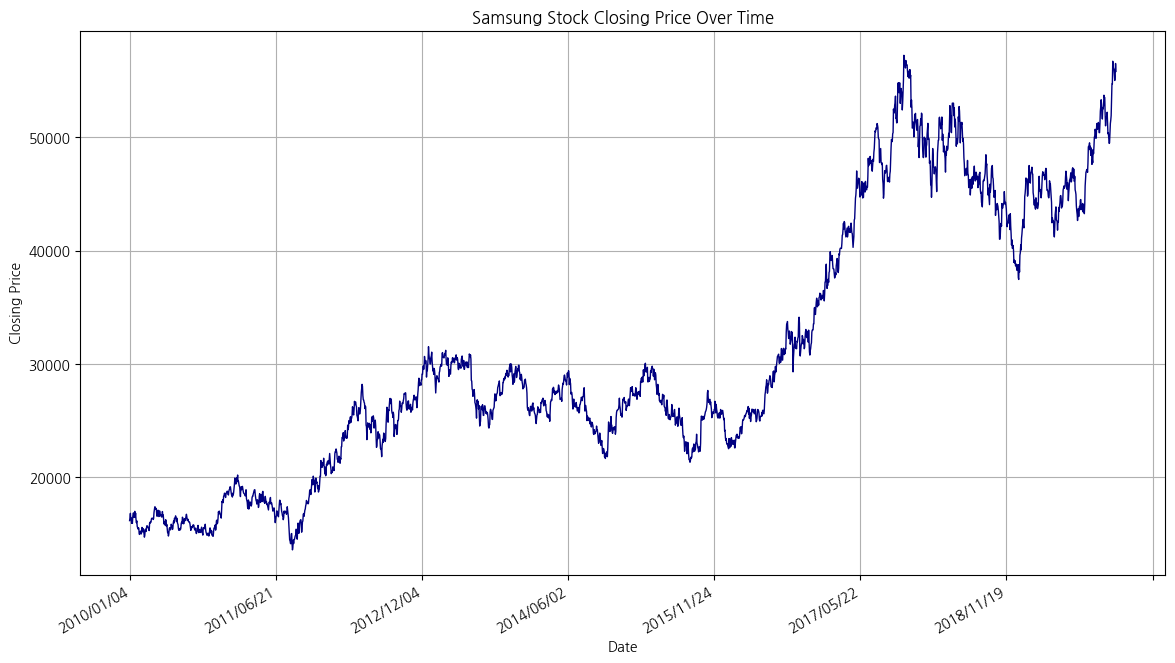

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(sam_df, color="navy", linewidth=1)

plt.title("Samsung Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

plt.grid(True)

plt.show()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(sam_df, model="additive", period=365)

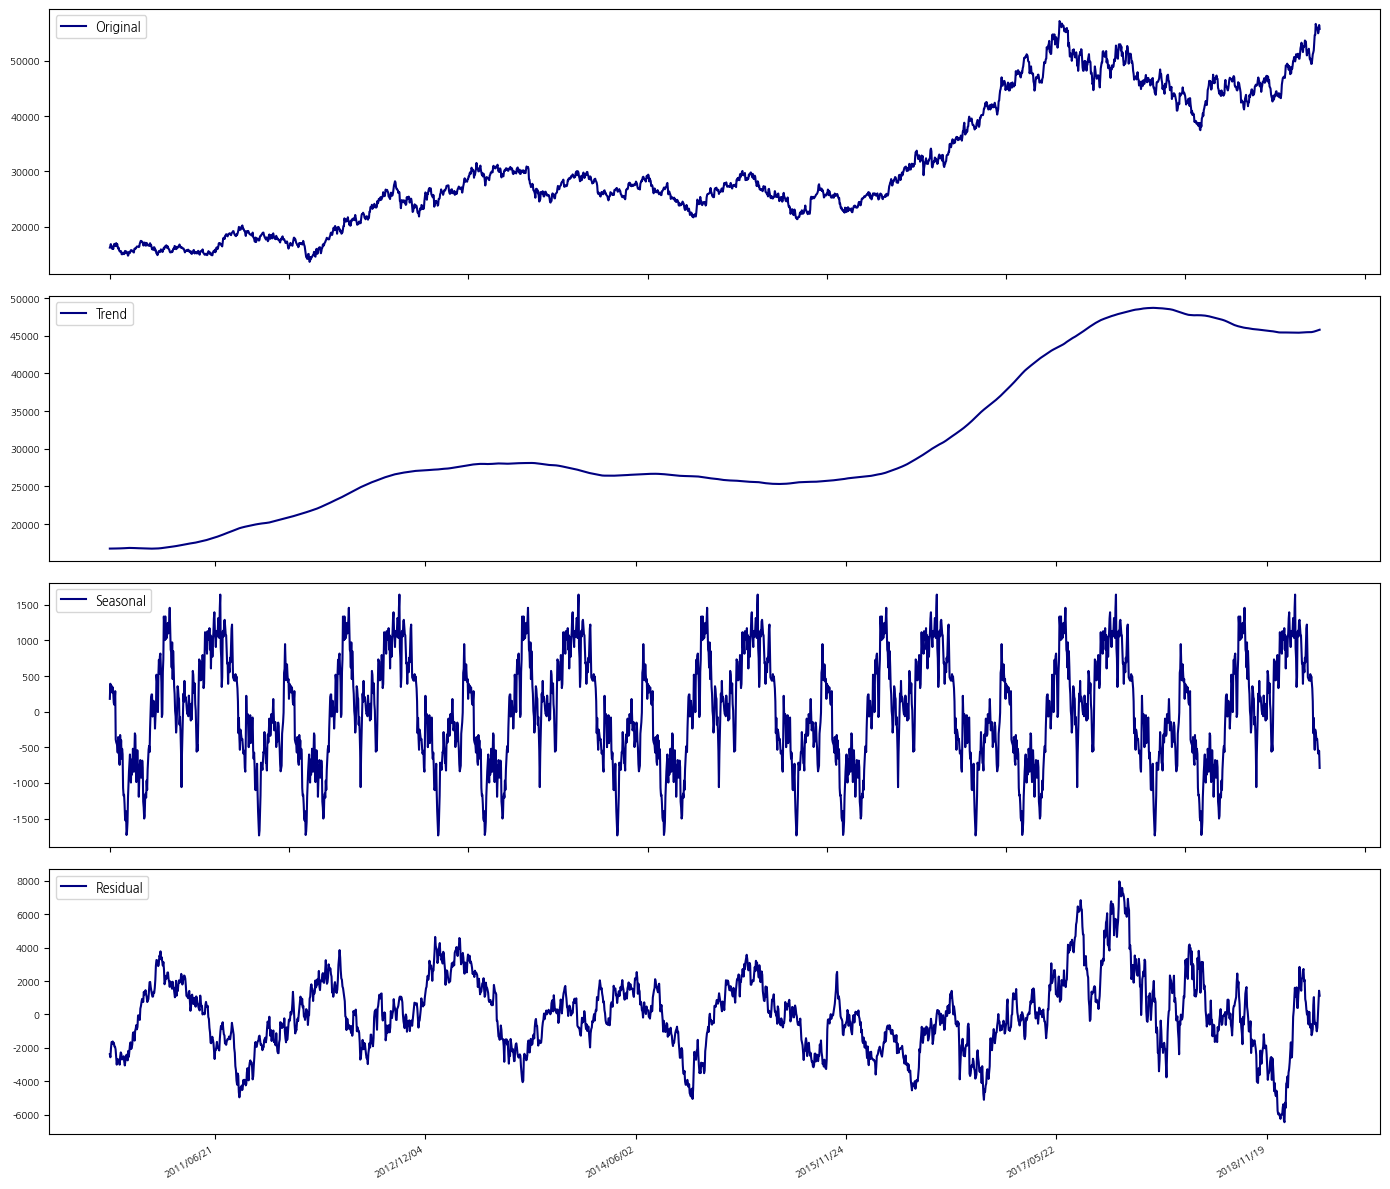

In [19]:
plt.figure(figsize=(14, 12))

# 원본 데이터 플롯
plt.subplot(4, 1, 1)
plt.plot(sam_df, label='Original', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

# 추세 플롯
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

# 계절성 플롯
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

# 잔차 플롯
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()


plt.tight_layout()
plt.show()